In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # For sharper figures, but it takes more time
import scipy as sp
from copy import deepcopy 

from lisatools.utils.constants import *
from lisatools.sensitivity import AET1SensitivityMatrix
from bbhx.waveformbuild import BBHWaveformFD

No CuPy
No CuPy or GPU PhenomHM module.
No CuPy or GPU interpolation available.
No CuPy or GPU response available.


In [3]:
def generate_noise(N, dt, sens_mat, seed=None):
    if seed is not None:
        np.random.seed(seed)
    noises = []
    for sens_fn in sens_mat.sens_mat:
        noise = np.fft.irfft(np.random.normal(0.0, np.sqrt(sens_fn))
                             +1j * np.random.normal(0.0, np.sqrt(sens_fn))
                            ) /np.sqrt(dt*4/N)
        noises.append(noise)
    noises = np.array(noises)
    return noises

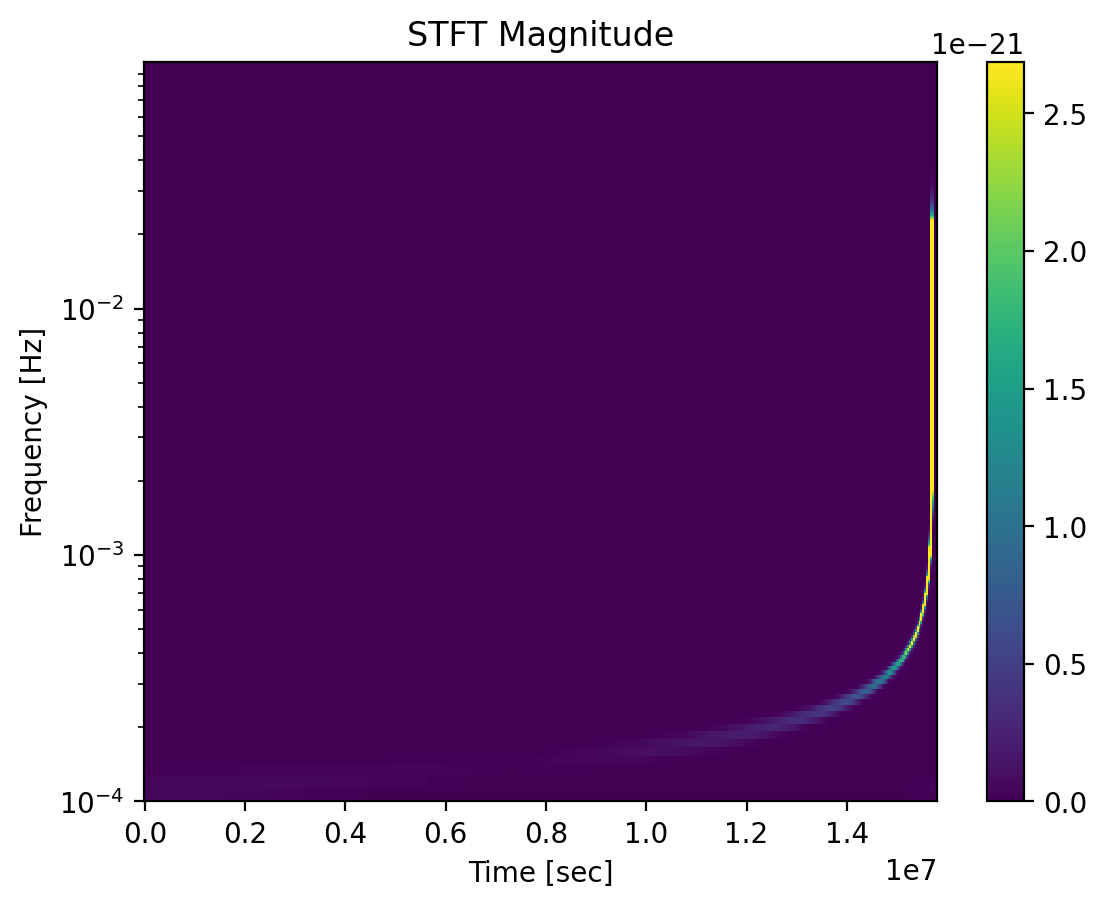

In [42]:
Tobs = YRSID_SI / 2.
dt = 5.
N = int(Tobs / dt)
Tobs = N * dt
freq = np.fft.rfftfreq(N,dt)
freq[0] = freq[1]

wave_gen = BBHWaveformFD(amp_phase_kwargs=dict(run_phenomd=False), use_gpu=False)

m1 = 2e5
m2 = 7e5
chi1z = 0.0
chi2z = 0.0
dist = 1 * 1e9 * PC_SI
phi_ref = 0.0
f_ref = 0.0
inc = np.pi/3.
beta= np.pi/20
lam = 0
psi = np.pi/3.
t_ref = Tobs - 60*60*24

modes = [(2,2)]#, (2,1), (3,3), (3,2), (4,4), (4,3)]

wave_freq_domain = wave_gen(m1, m2, chi1z, chi2z,
                            dist, phi_ref, f_ref, inc, lam,
                            beta, psi, t_ref, 
                            freqs=freq, modes=modes, 
                            direct=False, fill=True, squeeze=True, length=1024)[0]
wave_time_domain = np.fft.irfft(wave_freq_domain, axis=-1)

f, t, Zxx = sp.signal.stft(wave_time_domain[1], fs=1/dt, nperseg=15000)
max_freq = 0.1
max_freq_idx = np.searchsorted(f, max_freq)
min_freq = 1e-4
min_freq_idx = np.searchsorted(f, min_freq)

plt.figure()
plt.pcolormesh(t, f[min_freq_idx:max_freq_idx], np.abs(Zxx[min_freq_idx:max_freq_idx]), vmin=0, 
               vmax= np.max(np.abs(Zxx[min_freq_idx:max_freq_idx]))/10)
plt.yscale('log')


plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

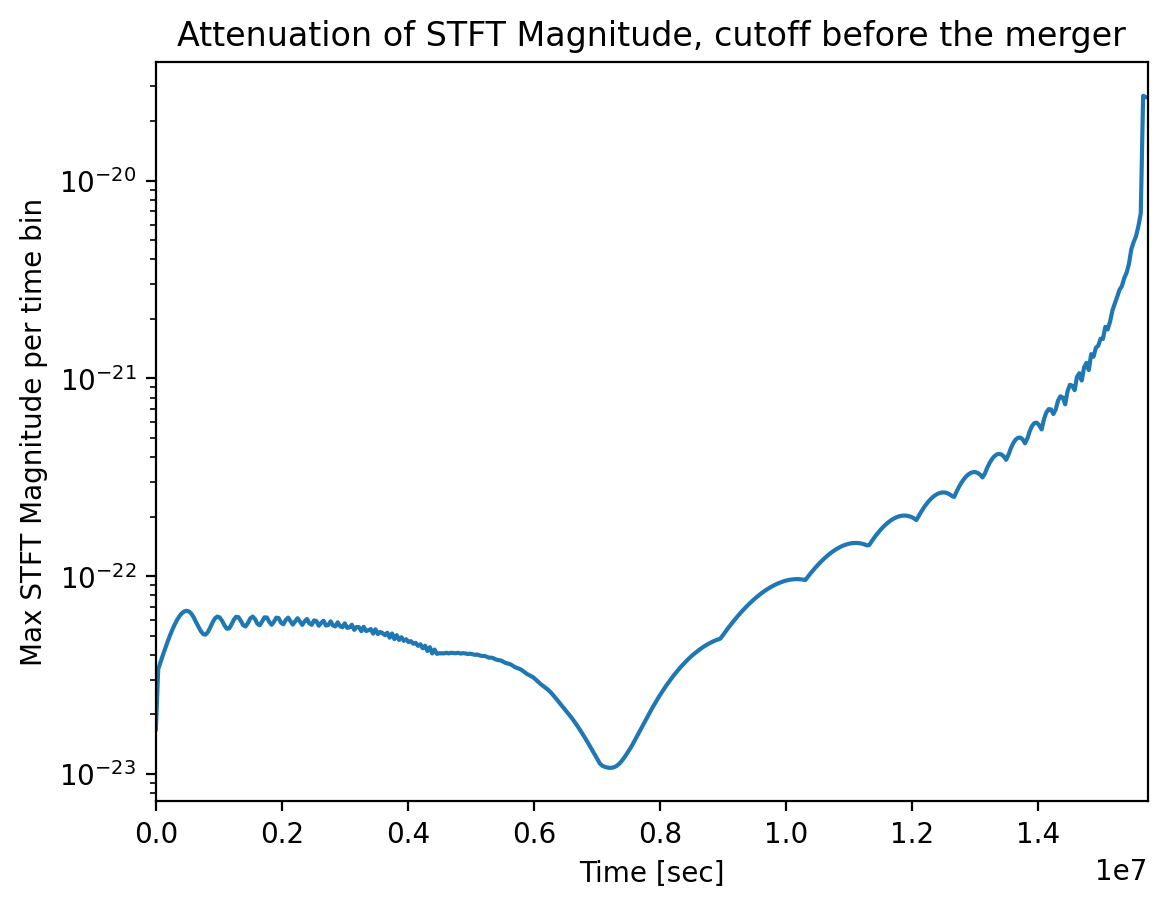

In [43]:
max_zxx = []
for i in range(0, len(Zxx[0])):
    max_zxx.append(np.max(np.abs(Zxx[:,i])))
max_zxx = np.array(max_zxx)
t_final = 420
plt.plot(t[0:t_final], max_zxx[0:t_final])
plt.xlim(t[0], t[t_final])
plt.title('Attenuation of STFT Magnitude, cutoff before the merger')
plt.ylabel('Max STFT Magnitude per time bin')
plt.xlabel('Time [sec]')
plt.yscale('log')

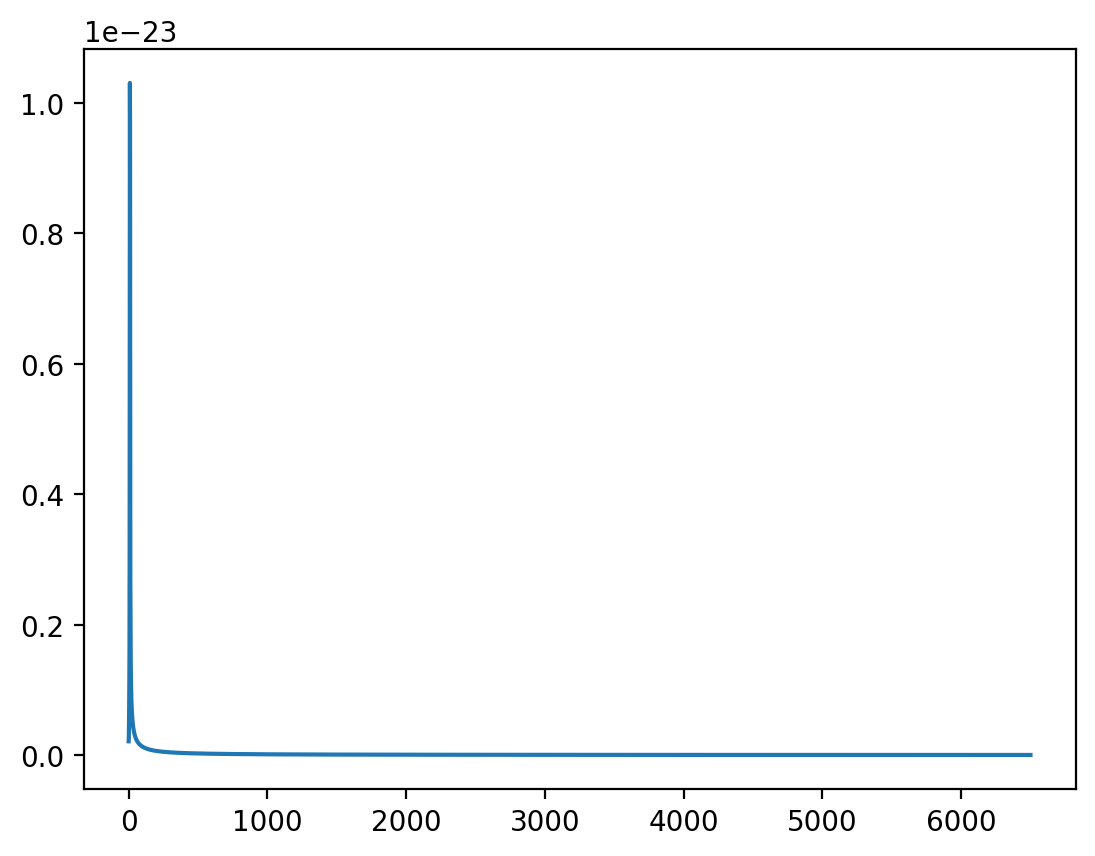

In [91]:
plt.plot(np.abs(Zxx[:,0]))

In [57]:
Zxx.shape, t.shape, f.shape, len(Zxx[:,0]), max_zxx.shape

((6501, 487), (487,), (6501,), 6501, (487,))

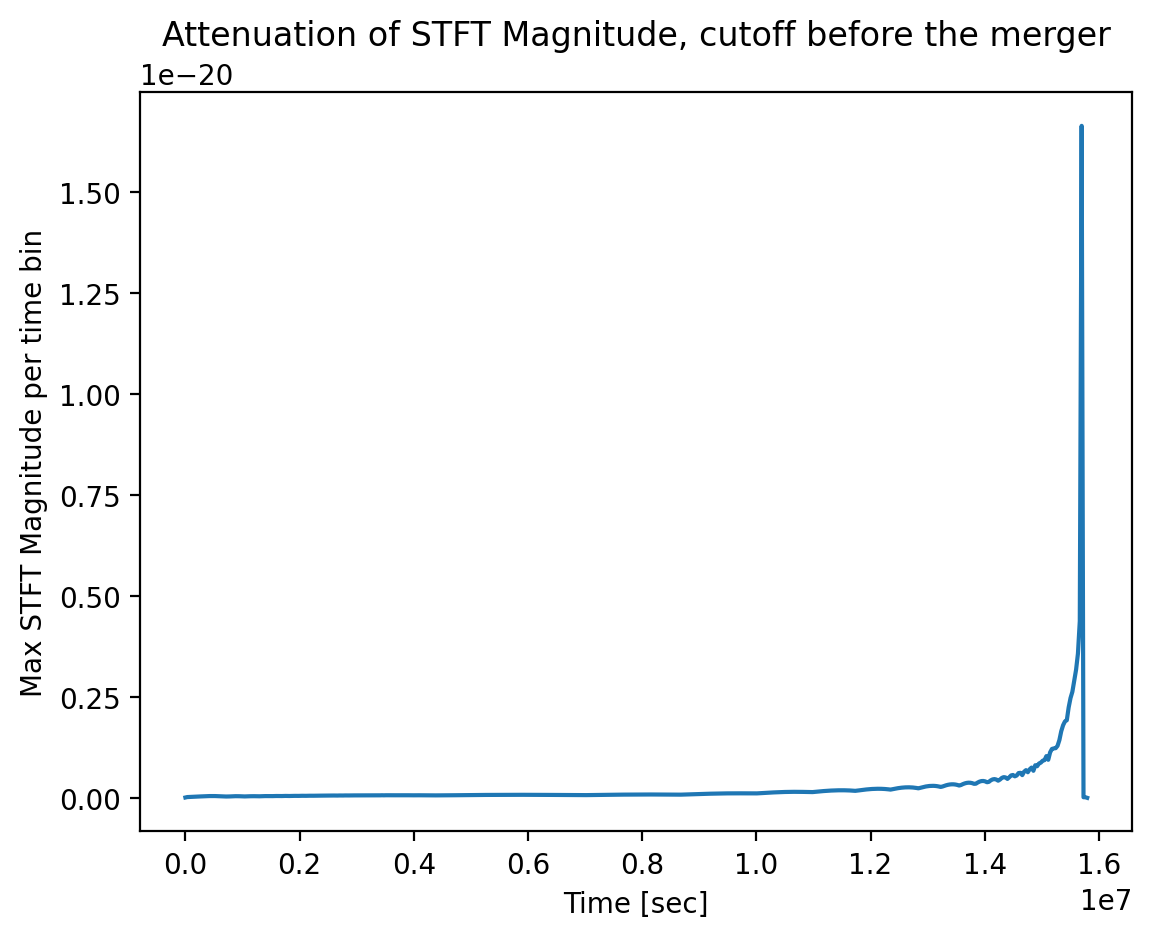

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(t, max_zxx)
#plt.xlim(t[0], t[400])
plt.title('Attenuation of STFT Magnitude, cutoff before the merger')
plt.ylabel('Max STFT Magnitude per time bin')
plt.xlabel('Time [sec]')
plt.show()
plt.figure()

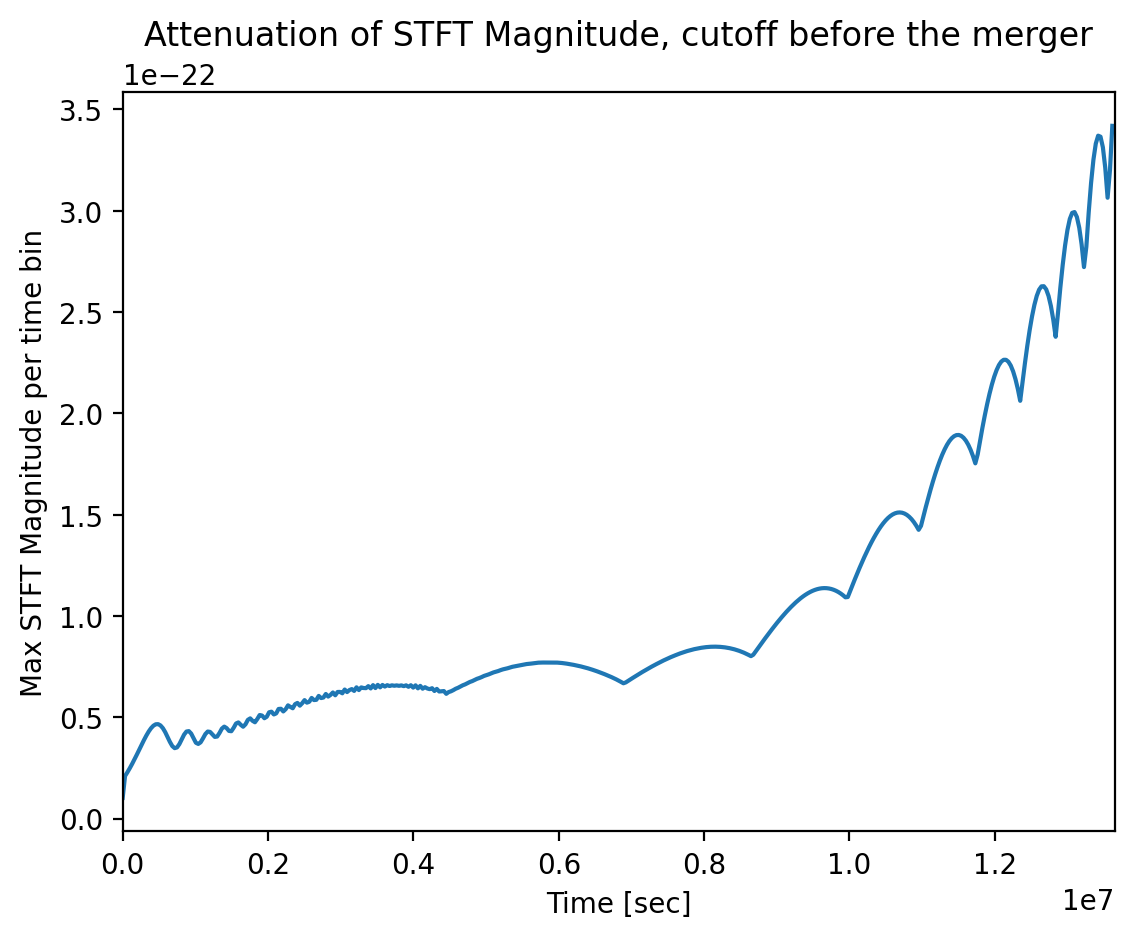

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
t_final = 420
plt.plot(t[0:t_final], max_zxx[0:t_final])
plt.xlim(t[0], t[t_final])
plt.title('Attenuation of STFT Magnitude, cutoff before the merger')
plt.ylabel('Max STFT Magnitude per time bin')
plt.xlabel('Time [sec]')
plt.show()
plt.figure()

In [27]:
bruh = [[1, 2, 4, 8],
        [10, 20, 40, 80]]
np.diff(bruh)

array([[ 1,  2,  4],
       [10, 20, 40]])

In [ ]:
f, t, Zxx = sp.signal.stft(wave_time_domain[0], fs=1/dt, nperseg=10000)
max_freq = 0.1
max_freq_idx = np.searchsorted(f, max_freq)
min_freq = 1e-4
min_freq_idx = np.searchsorted(f, min_freq)

plt.figure()
plt.pcolormesh(t, f[min_freq_idx:max_freq_idx], np.abs(Zxx[min_freq_idx:max_freq_idx]), vmin=0, vmax= np.max(np.abs(Zxx[min_freq_idx:max_freq_idx]))/10)
plt.yscale('log')

plt.ylim(min_freq, max_freq)

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
#sens_mat = AET1SensitivityMatrix(freq)
#noises = generate_noise(N, dt, sens_mat, seed = 42)

In [ ]:
f, t, Zxx = sp.signal.stft(wave_time_domain[0], fs=1/dt, nperseg=13000)
max_freq = 0.1
max_freq_idx = np.searchsorted(f, max_freq)
min_freq = 1e-4
min_freq_idx = np.searchsorted(f, min_freq)

plt.figure()
plt.pcolormesh(t, f[min_freq_idx:max_freq_idx], np.abs(Zxx[min_freq_idx:max_freq_idx]), vmin=0, vmax= np.max(np.abs(Zxx[min_freq_idx:max_freq_idx]))/10)
plt.yscale('log')

plt.ylim(min_freq, max_freq)

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
f, t, Zxx = sp.signal.stft(wave_time_domain[0], fs=1/dt, nperseg=13000)
max_freq = 0.1
max_freq_idx = np.searchsorted(f, max_freq)
min_freq = 1e-4
min_freq_idx = np.searchsorted(f, min_freq)

plt.figure()
plt.pcolormesh(t, f[min_freq_idx:max_freq_idx], np.abs(Zxx[min_freq_idx:max_freq_idx]), vmin=0, vmax= np.max(np.abs(Zxx[min_freq_idx:max_freq_idx]))/10)
plt.yscale('log')

plt.ylim(min_freq, max_freq)

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
len(wave_time_domain[0])

In [ ]:
wave_time_domain[0][0: int(len(wave_time_domain[0])/2)]

In [ ]:
signal = wave_time_domain[0]
#signal = wave_time_domain[0][0: int(len(wave_time_domain[0])/2)]

max_frequency = 0.1
min_frequency = 1e-4

f_mesh, t_mesh, sig_Z = sp.signal.stft(signal, 1/dt, nperseg=30000)
max_frequency_index = np.searchsorted(f_mesh, max_frequency)
min_frequency_index = np.searchsorted(f_mesh, min_frequency)

plt.figure()
plt.pcolormesh(t_mesh, f_mesh[min_frequency_index:max_frequency_index], (np.abs(sig_Z[min_frequency_index:max_frequency_index])), 
               vmin=np.abs(sig_Z).min(), vmax=np.abs(sig_Z).max()/10 )#, shading='gouraud')
plt.colorbar()
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.yscale('log')
#plt.xlim(t_mesh[-1]-60*60*24*10, t_mesh[-1])